In [2]:
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pymks
import pandas as pd
import os
from Scripts import velocityCalculations as vel
from Scripts import hoshenKopleman as hosh
import math
import time
from numpy import linalg as LA

# Show image and progression

--- 4.534451007843018 seconds ---


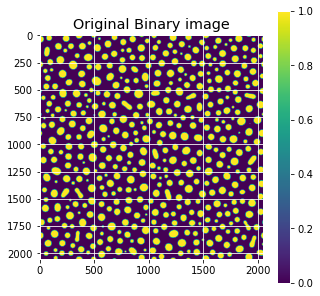

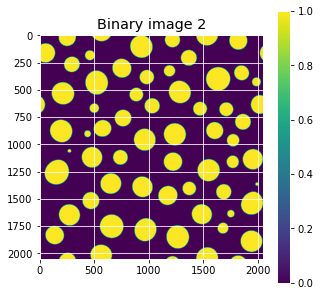

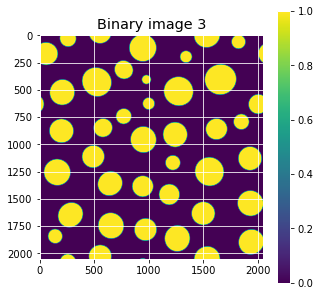

In [27]:
path = '/home/sushil/Desktop/adithya/ISOTROPIC/C03/'
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)
   
start_time = time.time()
img_ = corr.dat_to_numpy(list_files[30])
img_ = vel.gaussian_filter(img_,4)
img_ = (img_>0.5)*1
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(img_)
plt.colorbar()
plt.title('Original Binary image')
plt.show()


img_1 = corr.dat_to_numpy(list_files[1000])
img_1 = vel.gaussian_filter(img_1,4)
img_1 = (img_1>0.5)*1
plt.imshow(img_1)
plt.colorbar()
plt.title('Binary image 2')
plt.show()

img_2 = corr.dat_to_numpy(list_files[1900])
img_2 = vel.gaussian_filter(img_2,4)
img_2 = (img_2>0.5)*1
plt.imshow(img_2)
plt.colorbar()
plt.title('Binary image 3')
plt.show()


In [28]:
len(list_files)

2000

# 2 point statistics

In [ ]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_2)
print('white-white')
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

print('black-black')
plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

# Cross Correlations

cross = corr.cross_corr_from_code(img_2)
print('black-white')
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

#radial
r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title("radial distribution of probability")
plt.show()


# Velocity acc to level set methods, and further plots

In [ ]:
start = time.time()
velocity = vel.velocityMagnitude(list_files, 1900, 3)
print(start-time.time())
velocity1 = vel.velocityDirection(list_files, 1900, 3)

print('Calculated Velocity')


In [ ]:
x = np.zeros((128,128))
y = np.zeros((128,128))
M = np.zeros((128,128))           
for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            x[i][j] = np.min(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            x[i][j] = np.max(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])
        if np.max(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            y[i][j] = np.min(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            y[i][j] = np.max(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])   


for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity[i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            M[i][j] = np.min(velocity[i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            M[i][j] = np.max(velocity[i*16:(i+1)*16,j*16:(j+1)*16])


y = y*np.sign(M)
x = x*np.sign(M)
Fx = y
Fy = x
x_ = np.arange(0,128)
y_ = np.arange(0,128)
        
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.rcParams["figure.figsize"] = (20,20)
qq =plt.quiver(X, Y, Fx, Fy,np.abs(M),scale = 16,cmap=plt.cm.gray)
plt.colorbar(qq,cmap=plt.cm.jet)
plt.title('Velocity plot in pixels per time frame')
plt.show()

# Hoshen Kopleman plots

15.2001314163208  seconds
total number of ppts : 38


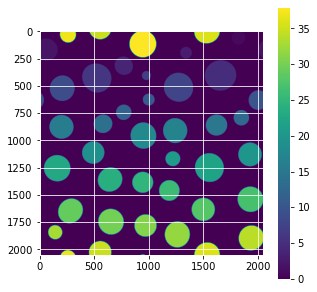

In [29]:
img_1 = corr.dat_to_numpy(list_files[1900])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1
start= time.time()
labels = hosh.hoshenKoplemanLabels(img_1)
print(time.time()-start, ' seconds')
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels)
plt.colorbar()
print('total number of ppts :', np.max(labels))

Text(0.5, 1.0, 'Size Distribution')

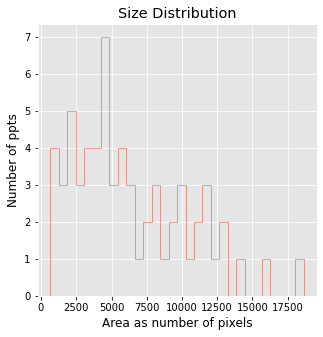

In [7]:
h =plt.hist(hosh.areaDistribution(labels), bins= 30,histtype=u'step')
plt.xlabel('Area as number of pixels')
plt.ylabel('Number of ppts')
plt.title('Size Distribution')

# Choosing ppt 1  and verifying calculations

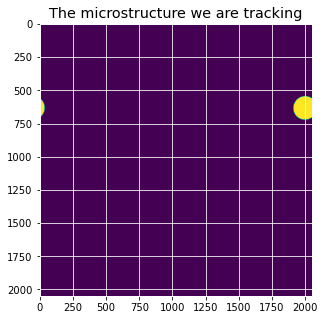

In [33]:
theChosenOne = 10
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels==theChosenOne)
plt.title('The microstructure we are tracking')
plt.show()

### Calculating Centre of mass for tracking

In [34]:
cog = hosh.precipitateCentres(labels,theChosenOne)
start= time.time()
theta, l, b, eig = hosh.findAngleMajorMinorEigenvector(labels,theChosenOne)
print('COG',cog)
print(theta,l, b, eig)
print(time.time()-start, ' seconds')

COG (631, 1995)
26.273413326230184 177.84302954097063 175.04633178393507 [[-0.89669193  0.44265515]
 [-0.44265515 -0.89669193]]
103.26899528503418  seconds


In [ ]:
# define cog here
area = []
velocity_median = []
veloArea = []
velogeo = []
for i in range(45):
    img_track1 = corr.dat_to_numpy(list_files[100+i*30])
    img_track1 = vel.gaussian_filter(img_track1,4)
    img_track1 = (img_track1>0.5)*1
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    label_for_our_ppt = labels_track1[cog[0]][cog[1]]
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    cog = hosh.precipitateCentres(hosh.hoshenKoplemanLabels(image_tracked1_binary),1)
    
    area0 = np.sum(image_tracked1_binary)
    area.append(np.sum(image_tracked1_binary))
#     radius_by_area0 = math.sqrt(area0/3.1415)
#     radius_by_geo = np.sum(image_tracked1_binary[cog[0]]+image_tracked1_binary[:][cog[1]])/2
#     print(area0,' ',radius_by_area0,' ',radius_by_geo)
    
#     img_track1 = corr.dat_to_numpy(list_files[500+i*30+2])
#     img_track1 = vel.gaussian_filter(img_track1,4)
#     img_track1 = (img_track1>0.5)*1
#     labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
#     label_for_our_ppt = labels_track1[cog[0]][cog[1]]
#     image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
#     area0 = np.sum(image_tracked1_binary)
#     radius_by_area0_plus = math.sqrt(area0/3.1415)
#     radius_by_geo_plus = np.sum(image_tracked1_binary[cog[0]]+image_tracked1_binary[:][cog[1]])/2
#     print('plus',area0,' ',radius_by_area0_plus,' ',radius_by_geo_plus)

    
#     img_track1 = corr.dat_to_numpy(list_files[500+i*30-2])
#     img_track1 = vel.gaussian_filter(img_track1,4)
#     img_track1 = (img_track1>0.5)*1
#     labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
#     label_for_our_ppt = labels_track1[cog[0]][cog[1]]
#     image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
#     area0 = np.sum(image_tracked1_binary)
#     radius_by_area0_minus = math.sqrt(area0/3.1415)
#     radius_by_geo_minus = np.sum(image_tracked1_binary[cog[0]]+image_tracked1_binary[:][cog[1]])/2
#     print('minus',area0,' ',radius_by_area0_minus,' ',radius_by_geo_minus)

#     vel_by_area = (radius_by_area0_plus-radius_by_area0_minus)/4
#     veloArea.append(vel_by_area)
    
#     vel_by_area_geo = (radius_by_geo_plus-radius_by_geo_minus)/4
#     velogeo.append(vel_by_area_geo)
    
    print(i)
#     velocity = vel.velocityMagnitude(list_files, 500+i*30, 1)
#     X = []
#     for i in range(velocity.shape[0]):
#         for j in range(velocity.shape[1]):
#             if velocity[i][j]>0 :
#                 X.append(velocity[i][j])
    
    
    
#     velocity_median.append(np.median(X))

In [ ]:
plt.title('Area Plot')
plt.plot(area)
plt.show()

In [ ]:
plt.plot(veloArea,label='area')
plt.plot(velocity_median,label='level set')
plt.ylabel('Velocity, pixel/time frame')
plt.legend()

## Looking at assymetry

In [ ]:

k = []
k1 = []
for i in range(150):
    img_track1 = corr.dat_to_numpy(list_files[500+i*9])
    img_track1 = vel.gaussian_filter(img_track1,4)
    img_track1 = (img_track1>0.5)*1
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    label_for_our_ppt = labels_track1[cog[0]][cog[1]]
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    cog = hosh.precipitateCentres(hosh.hoshenKoplemanLabels(image_tracked1_binary),1)
    
    area0 = np.sum(image_tracked1_binary)
    char_length = np.sum(image_tracked1_binary[cog[0]])
    k.append(area0/char_length/char_length)
    
    
    

In [ ]:
plt.title('Checking symmetry constant K')
plt.plot(k)
plt.show()

plt.title('Checking symmetry constant K1')
plt.plot(k1)
plt.show()
